In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = pd.read_excel('Budget.xlsx')
df.dropna(inplace = True)
df['Data_Value'] = pd.to_numeric(df['Data_Value'], errors='coerce')
df.dropna(subset=['Data_Value'], inplace=True)
print (df.head())


   TimePeriod          Area_Name   Indicator_Name  Data_Value
0        2001    Jammu & Kashmir  Non-Plan Budget   198609000
1        2001   Himachal Pradesh  Non-Plan Budget    48120000
2        2001             Punjab  Non-Plan Budget   469715000
3        2001         Chandigarh  Non-Plan Budget    21803000
4        2001        Uttarakhand  Non-Plan Budget    85359500


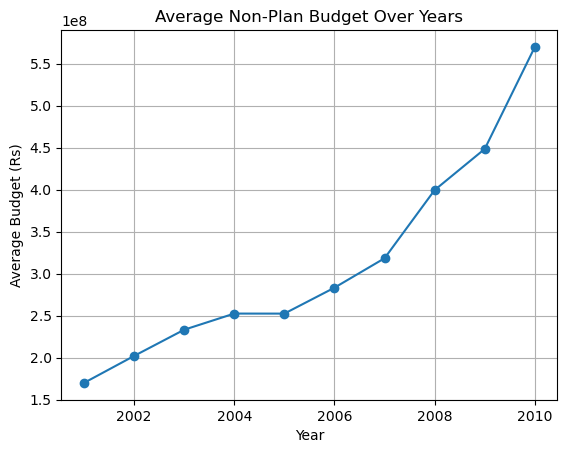

In [12]:
import matplotlib.pyplot as plt
avg_budget_by_year = df.groupby('TimePeriod')['Data_Value'].mean()
plt.plot(avg_budget_by_year.index, avg_budget_by_year.values, marker='o')
plt.title("Average Non-Plan Budget Over Years")
plt.xlabel("Year")
plt.ylabel("Average Budget (Rs)")
plt.grid(True)
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
x= df[['TimePeriod']]
y= df['Data_Value']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)



MSE: 1.370114094203855e+17
R² Score: 0.03993954120628851


In [20]:
model= LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 1.370114094203855e+17
R² Score: 0.03993954120628851


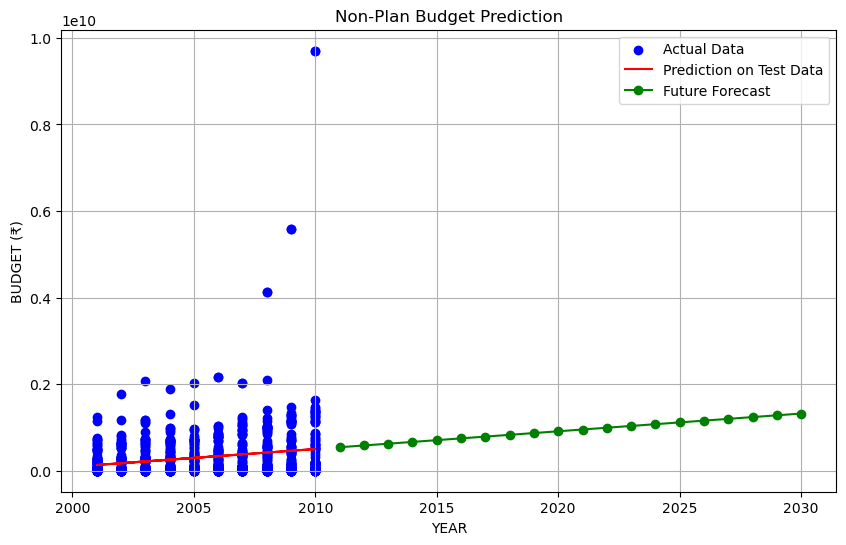

In [28]:
future_years = pd.DataFrame({'TimePeriod': [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025, 2026, 2027,2028,2029,2030]})
future_budget = model.predict(future_years)

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x_test, y_pred, color='red', label='Prediction on Test Data')
plt.plot(future_years, future_budget, color='green', marker='o', label='Future Forecast')
plt.title("Non-Plan Budget Prediction")
plt.xlabel("YEAR")
plt.ylabel("BUDGET (₹)")
plt.legend()
plt.grid(True)
plt.show()